In [269]:
import networkx as nx
import DSGRN
from DSGRN import *

import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from networkx_cond import *
from GradientFun import *

from save_files import *
from get_FG import *
from get_FP_Poset import *
from all_networks_with_n_nodes_e_edges import *
from Anaylizing_cond_functions import *
from metrics import *
from graph_clustering import *
import sys
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/Optimized_Ncut_Directed_and_Undirected/src')
from Clustering_by_weighted_cuts_in_directed_graphs import *
import sys
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/SuperPC')
from network_prelim import *

from network_topology_fun import *

In [270]:
import json
# New network-of-interest numbers
# 18176: 'FullConn',  46402: 'StrongEdges'
# 23552:'network1.21', 38914:'network1.52'

with open('true_monostable_results_w_all_possible_networks.json') as f:
    all_pos = json.load(f)

In [271]:
results = {}
need_cut = 0
cant_cut = 0
no_path = 0
verd = 0
baseline = 0
for r in all_pos:
    if all_pos[r]['Done'] == True:
        if all_pos[r]['results']['WCut'] != 'issue':
            results[int(r)] = all_pos[r]
            if all_pos[r]['Main'] == True:
                baseline += 1
            if all_pos[r]['Lit Subnetwork'] == True:
                verd += 1
        if all_pos[r]['results']['WCut'] == 'issue':
            cant_cut +=1
    elif 'results' in all_pos[r]:
        if all_pos[r]['results']['path exists'] == False:
            no_path +=1
        else:
            need_cut +=1
print('Done: ', len(results), '\nBaseline: ', baseline, '\nNo Path: ', no_path, '\nNeed Cut Redone: ', need_cut, '\nCan\'t Cut: ', cant_cut, '\nTotal: ', len(results)+need_cut, '\nVerd Networks: ', verd , '\nAll Networks: ', len(all_pos) )

Done:  667 
Baseline:  500 
No Path:  1 
Need Cut Redone:  0 
Can't Cut:  17 
Total:  667 
Verd Networks:  96 
All Networks:  58368


In [272]:
for n in results:
    results[n]['results']['graph ratio'] = (results[n]['results']['diagP nodes in G'] + results[n]['results']['diagP edges in G'])/(results[n]['results']['G size'] + results[n]['results']['G edges'])

In [273]:
score_dict = {'WCut':1, 'graph ratio':1}
m_score_dict = {'leak + skip':1}

ma = max([results[i]['results']['markov_results']['leak + skip'] for i in results])
mi = min([results[i]['results']['markov_results']['leak + skip'] for i in results])
m_score_dict['leak + skip'] = (ma,mi)

for key in score_dict:
    ma = max([results[r]['results'][key] for r in results])
    mi = min([results[r]['results'][key] for r in results])
    score_dict[key] = (ma,mi)

score_dict, m_score_dict

({'WCut': (0.43080204689899154, 0.007346283482096533),
  'graph ratio': (0.24284378431464704, 0.00749393077497551)},
 {'leak + skip': (0.9999990933749868, 0.7172719423881686)})

In [274]:
keys = ['nWCut', 'nGraph', 'nls'] # normalize the scores
for r in results:
    results[r]['nWCut'] = (results[r]['results']['WCut']-score_dict['WCut'][1])/(score_dict['WCut'][0]-score_dict['WCut'][1])
    results[r]['nGraph'] = (results[r]['results']['graph ratio']-score_dict['graph ratio'][1])/(score_dict['graph ratio'][0]-score_dict['graph ratio'][1])
    results[r]['nls'] = 1-((results[r]['results']['markov_results']['leak + skip']-m_score_dict['leak + skip'][1])/(m_score_dict['leak + skip'][0] - m_score_dict['leak + skip'][1]) )

In [306]:
# 18176: 'FullConn',  46402: 'StrongEdges'
# 23552:'network1.21', 38914:'network1.52'

interest = [46402, 18176, 4130, 48128, 53102, 9391, 2272, 38914] #8219
name = ['StrongEdges', 'FullConn', 'network 4130', 'network 48128', 'network 53102', 'network 9391', 'network 2272', 'network 38914']
interest_color = {}
interest_marker = {}
interest_name = {}
count = 0
pallet = ['darkorange', 'red', 'blue', 'green', 'black', 'fuchsia', 'darkorchid', 'yellowgreen' ]
marker = ['s','o', 'p', 'X',  '^', 'D', 'P', 'v' ]
for i in interest:
    interest_name[i] = name[count]
    interest_color[i] = pallet[count]
    interest_marker[i] = marker[count]
    count += 1

0.2146668069244134
0.2923525360634026


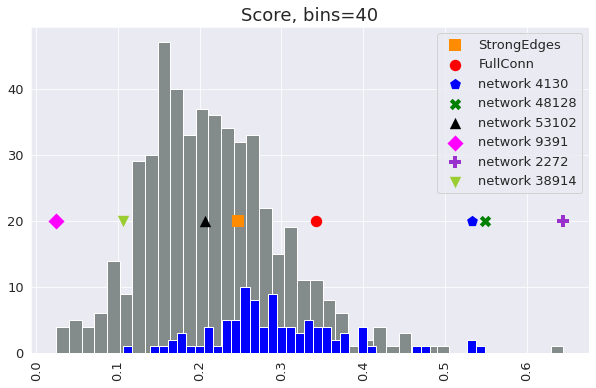

In [307]:
from cProfile import label
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore

sns.color_palette('deep')

plt.rcParams.update({'font.size': 18})
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

x = []
x1 = []
c = {}
m = 40
n=3

for r in results:
    score = (results[r]['nWCut'] + results[r]['nGraph'] + results[r]['nls'])/n
    if results[r]['Main'] == True:
        x.append(score)
    elif results[r]['Lit Subnetwork'] == True:
        x1.append(score)
    if r in interest:
        c[r] = score
    results[r]['score'] = score
print(sum(x)/len(x))
print(sum(x1)/len(x1))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 18})
bins = 40
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain')
plt.title('Score, bins='+str(bins))
plt.hist(x, bins,color='#838B8B')
plt.hist(x1, bins, color='b')
for i in interest:
    plt.scatter(c[i], 20, color=interest_color[i], label=interest_name[i], marker=interest_marker[i], s=130,  linewidth=0 )
name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/score1.png"
plt.legend()    
plt.savefig(name,dpi=300, bbox_inches = "tight")
plt.show()
plt.close() 

In [308]:
for r in results:
    if round(results[r]['score'], 2) == .21:
        if results[r]['ACDC1'] == True:
            print(r)

53102


### CSV file construction for data analytics

In [309]:
for r in results:
    results[r]['# neg edges'] = 8-sum(results[r]['edges'][1])

In [310]:
fields = ['Network', 'score', 'nWCut', 'nGraph', 'nls', 'Main', '# neg edges', 'PFL', 'NFL', 'ACDC1', 'ACDC2', 'ACDC3', 'Lit Subnetwork', 'Ultra Strong']
rows = []
for r in results:
    row = [r]
    for key in fields[1:]:
        row.append(results[r][key])
    rows.append(row)
len(rows)

667

In [351]:
import csv 

filename = "network_robustness_data_12062022.csv"
    
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields) 
    csvwriter.writerows(rows)

In [312]:
interest_order = []
for i in interest:
    for r in results:
        if i == r:
            interest_order.append((i, results[r]['score']))
interest_order = sorted(interest_order, key=lambda d: d[1], reverse=True)
interest_order

[(2272, 0.6449866762875419),
 (48128, 0.5486516319559908),
 (4130, 0.5326821529308123),
 (18176, 0.3422172232222551),
 (46402, 0.2465462623062679),
 (53102, 0.205904135598331),
 (38914, 0.10603838953764354),
 (9391, 0.024449815082296406)]

In [313]:
print('network \t', 'WCut \t','nWCut \t', '1-nls \t' ,'nGraph', 'score')
for n in interest_order:
    i = n[0]
    for net in results:
        if i == net:
            r = results[net]
            print(interest_name[net]+ ' &','\t', round(r['results']['WCut'],2), '&', round(r['nWCut'],2), '&', round(r['nls'],2),'&',  round(r['nGraph'],2),'&',round(r['score'],2),'&', interest_color[net], r' \\ ')

network 	 WCut 	 nWCut 	 1-nls 	 nGraph score
network 2272 & 	 0.19 & 0.44 & 1.0 & 0.5 & 0.64 & darkorchid  \\ 
network 48128 & 	 0.21 & 0.48 & 0.46 & 0.71 & 0.55 & green  \\ 
network 4130 & 	 0.43 & 1.0 & 0.1 & 0.5 & 0.53 & blue  \\ 
FullConn & 	 0.11 & 0.24 & 0.41 & 0.38 & 0.34 & red  \\ 
StrongEdges & 	 0.13 & 0.29 & 0.06 & 0.39 & 0.25 & darkorange  \\ 
network 53102 & 	 0.08 & 0.16 & 0.21 & 0.24 & 0.21 & black  \\ 
network 38914 & 	 0.05 & 0.1 & 0.06 & 0.16 & 0.11 & yellowgreen  \\ 
network 9391 & 	 0.03 & 0.04 & 0.0 & 0.03 & 0.02 & fuchsia  \\ 


In [339]:
get_info_for = ['WCut', 'graph ratio']
for key in get_info_for:
    lst = [results[r]['results'][key] for r in results if results[r]['Main'] == True]
    w, m, a = min(lst), max(lst), sum(lst)/len(lst)
    print(key + ' & ' + str(round(w,2)) + ' & ' + str(round(a,2)) + ' & ' + str(round(m,2)))

lst = [1-results[r]['results']['markov_results']['leak + skip'] for r in results if results[r]['Main'] == True]
w, m, a = min(lst), max(lst), sum(lst)/len(lst)
print('leak + skip & ' + str(round(w,2)) + ' & ' + str(round(a,2)) + ' & ' + str(round(m,2)))

lst = [results[r]['score'] for r in results if results[r]['Main'] == True]
w, m, a = min(lst), max(lst), sum(lst)/len(lst)
print('score & ' + str(round(w,2)) + ' & ' + str(round(a,2)) + ' & ' + str(round(m,2)))


WCut & 0.01 & 0.08 & 0.3
graph ratio & 0.01 & 0.09 & 0.24
leak + skip & 0.0 & 0.03 & 0.28
score & 0.02 & 0.21 & 0.64


In [338]:
get_info_for = ['WCut', 'graph ratio']
for key in get_info_for:
    lst = [results[r]['results'][key] for r in results if results[r]['Lit Subnetwork'] == True]
    w, m, a = min(lst), max(lst), sum(lst)/len(lst)
    print(key + ' & ' + str(round(w,2)) + ' & ' + str(round(a,2)) + ' & ' + str(round(m,2)))

lst = [1-results[r]['results']['markov_results']['leak + skip'] for r in results if results[r]['Lit Subnetwork'] == True]
w, m, a = min(lst), max(lst), sum(lst)/len(lst)
print('leak + skip & ' + str(round(w,2)) + ' & ' + str(round(a,2)) + ' & ' + str(round(m,2)))

lst = [results[r]['score'] for r in results if results[r]['Lit Subnetwork'] == True]
w, m, a = min(lst), max(lst), sum(lst)/len(lst)
print('score & ' + str(round(w,2)) + ' & ' + str(round(a,2)) + ' & ' + str(round(m,2)))

WCut & 0.02 & 0.11 & 0.43
graph ratio & 0.04 & 0.13 & 0.23
leak + skip & 0.0 & 0.04 & 0.14
score & 0.11 & 0.29 & 0.55


In [350]:
get_info_for = ['nWCut', 'nGraph', 'score']
for key in get_info_for:
    lst = [results[r][key] for r in results if results[r]['Main'] == True]
    w, m, a = round(min(lst),2), round(max(lst),2), round(sum(lst)/len(lst),2)
    lst = [results[r][key] for r in results if results[r]['Lit Subnetwork'] == True]
    w1, m1, a1 = round(min(lst),2), round(max(lst),2), round(sum(lst)/len(lst),2)
    lst = [results[r][key] for r in results if results[r]['ACDC2'] == True]
    w2, m2, a2 = round(min(lst),2), round(max(lst),2), round(sum(lst)/len(lst),2)
    
    print(key + ' & ' + str(w) + ' & ' + str(a) + ' & ' + str(m) + ' & ' + str(w1) + ' & ' + str(a1) + ' & ' + str(m1) + ' & ' + str(w2) + ' & ' + str(a2) + ' & ' + str(m2) + ' \\\ ')

lst = [results[r]['nls'] for r in results if results[r]['Main'] == True]
w, m, a = round(min(lst),2), round(max(lst),2), round(sum(lst)/len(lst),2)
lst = [results[r]['nls'] for r in results if results[r]['Lit Subnetwork'] == True]
w1, m1, a1 = round(min(lst),2), round(max(lst),2), round(sum(lst)/len(lst),2)
lst = [results[r]['nls'] for r in results if results[r]['ACDC2'] == True]
w2, m2, a2 = round(min(lst),2), round(max(lst),2), round(sum(lst)/len(lst),2)

print('nls' + ' & ' + str(w) + ' & ' + str(a) + ' & ' + str(m) + ' & ' + str(w1) + ' & ' + str(a1) + ' & ' + str(m1) + ' & ' + str(w2) + ' & ' + str(a2) + ' & ' + str(m2) + ' \\\ ')

nWCut & 0.0 & 0.17 & 0.7 & 0.03 & 0.23 & 1.0 & 0.02 & 0.2 & 0.58 \\ 
nGraph & 0.0 & 0.35 & 1.0 & 0.16 & 0.51 & 0.93 & 0.27 & 0.57 & 0.93 \\ 
score & 0.02 & 0.21 & 0.64 & 0.11 & 0.29 & 0.55 & 0.17 & 0.32 & 0.46 \\ 
nls & 0.0 & 0.12 & 1.0 & 0.0 & 0.14 & 0.49 & 0.0 & 0.17 & 0.54 \\ 


In [333]:
for n in results:
    if results[n]['results']['WCut'] >= .3:
        print(n)

4130
12485


In [317]:
from scipy import stats

y = [results[r]['results']['markov_results']['leak + skip'] for r in results if results[r]['Main'] == True]
x = [results[r]['results']['markov_results']['leak + skip'] for r in results if results[r]['Lit Subnetwork'] == True]

a = np.array(x)
b = np.array(y)
s, p = stats.ttest_ind(a,b,equal_var=False)
round(p, 5)*100

22.458

In [318]:
from scipy import stats
#stats.pearsonr(a,b) #r-value and p-value.  A value of r=+1 indicates perfect linearity. 
# A value of r = 0 indicates no correlation (the variables are independent) 
# and r = -1 indicates the variables are inversely correlated (an increase in one variable is associated with a decrease in the other).
# A low p-value would lead you to reject the null hypothesis.
#  A typical threshold for rejection of the null hypothesis is a p-value of 0.05.
#  That is, if you have a p-value less than 0.05, you would reject the null hypothesis in favor of the alternative hypothesis
# —that the correlation coefficient is different from zero.

# A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 
# or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

Y = ['PG size', 'G size', 'cG size', 'diagP size', 'PG size', 'G size', 'PG size', 'cG size','PG size', 'G size', 'cG size', 'diagP size']
X = ['WCut', 'WCut', 'WCut', 'WCut', 'G size', 'cG size', 'cG size', 'diagP size', 'graph ratio', 'graph ratio', 'graph ratio', 'graph ratio']

for p in range(len(X)):
    lx = X[p]
    ly = Y[p]
    y = []
    x = []
    for r in results:
        y.append(results[r]['results'][ly])
        x.append(results[r]['results'][lx])
    #plt.figure(figsize=(10,5))
    #plt.ticklabel_format(style='plain')
    a = np.array(x)
    b = np.array(y)
    r, p = stats.pearsonr(a,b)
    #sns.regplot(a,b)
    string = ly + ' vs ' + lx + ' r='+str(round(r,4))+' p-value='+str(round(p,4))
    print(string)
    #plt.title(string)
    #name = '/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/' + ly + ' vs ' + lx + '.png'
    #plt.savefig(name,dpi=300, bbox_inches = "tight")   # save the figure to file
    #plt.show()
    #plt.close() 

PG size vs WCut r=0.0377 p-value=0.3304
G size vs WCut r=0.0537 p-value=0.1659
cG size vs WCut r=0.0551 p-value=0.1548
diagP size vs WCut r=0.0645 p-value=0.0962
PG size vs G size r=0.6635 p-value=0.0
G size vs cG size r=0.2043 p-value=0.0
PG size vs cG size r=0.2327 p-value=0.0
cG size vs diagP size r=0.6955 p-value=0.0
PG size vs graph ratio r=-0.0733 p-value=0.0586
G size vs graph ratio r=0.0618 p-value=0.1109
cG size vs graph ratio r=-0.1349 p-value=0.0005
diagP size vs graph ratio r=0.3831 p-value=0.0


In [319]:
Y = ['WCut', 'PG size', 'G size', 'cG size', 'diagP size']
X = ['leak + skip', 'leak + skip','leak + skip','leak + skip','leak + skip']

for p in range(len(X)):
    lx = X[p]
    ly = Y[p]
    y = []
    x = []
    for r in results:
        y.append(results[r]['results'][ly])
        x.append(results[r]['results']['markov_results'][lx])
    #plt.figure(figsize=(10,5))
    #plt.ticklabel_format(style='plain')
    a = np.array(x)
    b = np.array(y)
    r, p = stats.pearsonr(a,b)
    #sns.regplot(a,b)
    string = ly + ' vs ' + lx + ' r='+str(round(r,4))+' p-value='+str(round(p,4))
    print(string)
    #plt.title(string)
    #name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/" + ly + ' vs ' + lx + ".png"
    #plt.savefig(name,dpi=300, bbox_inches = "tight")   # save the figure to file
    #plt.show()
    #plt.close() 

WCut vs leak + skip r=-0.0919 p-value=0.0176
PG size vs leak + skip r=-0.0431 p-value=0.2659
G size vs leak + skip r=-0.0771 p-value=0.0466
cG size vs leak + skip r=0.1342 p-value=0.0005
diagP size vs leak + skip r=0.0402 p-value=0.3001


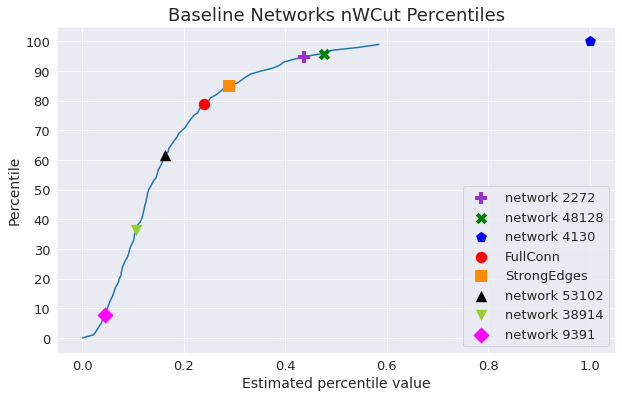

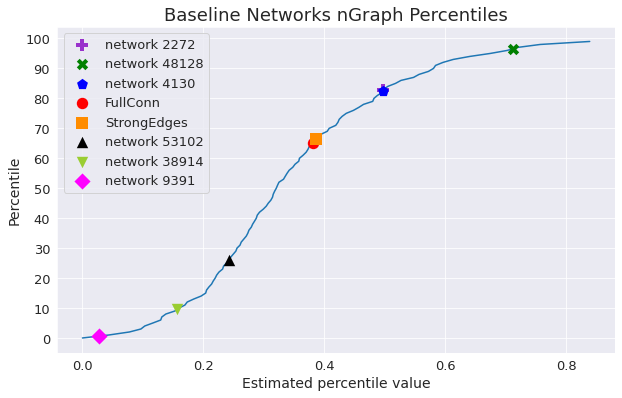

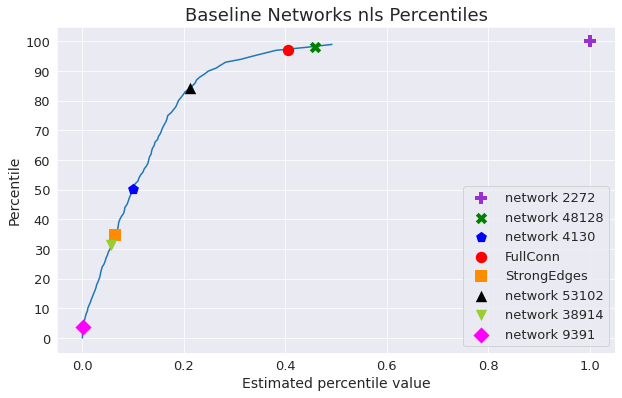

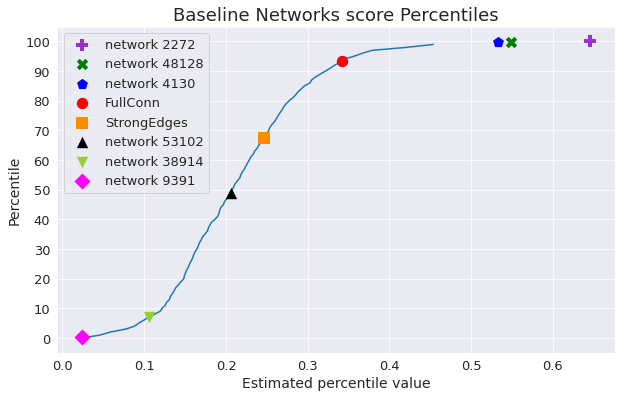

In [334]:
from cProfile import label

bins = 40
for key in ['nWCut', 'nGraph', 'nls', 'score']:
    plt.figure(figsize=(10,6))
    y = range(0, 100)
    ax = plt.gca()
    ax.set(title='Baseline Networks ' + key + ' Percentiles', 
        ylabel='Percentile',
        xlabel='Estimated percentile value',
        yticks = range(0, 101, 10))

    x = sorted([results[i][key] for i in results if results[i]['Main'] == True])
    
    plt.plot(np.percentile(x, y), y, zorder=1)
    for n in interest_order:
        i = n[0]
        sns.scatterplot([results[i][key]], [percentileofscore(x, results[i][key])],  color=interest_color[i], marker=interest_marker[i], s=130, label = interest_name[i], linewidth=0)
    name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/"+key+"_percentiles.png"

    plt.legend()    
    plt.savefig(name,dpi=300, bbox_inches = "tight")
    plt.show()


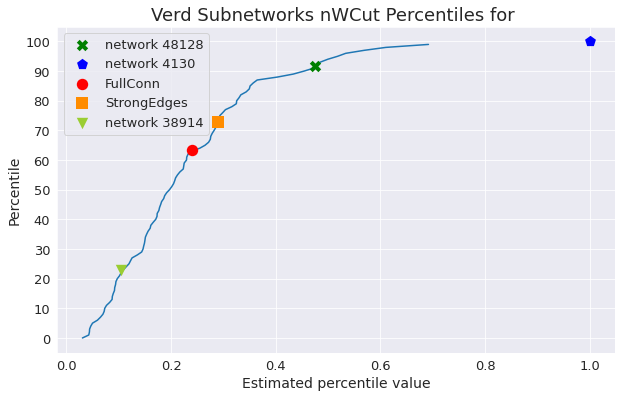

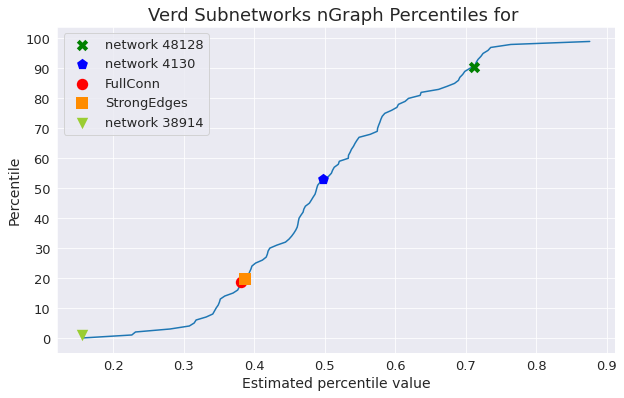

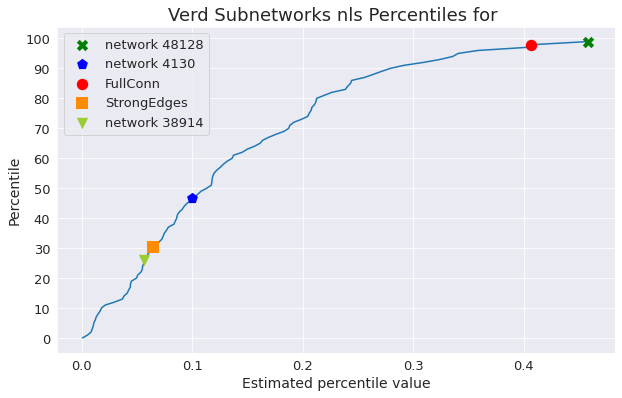

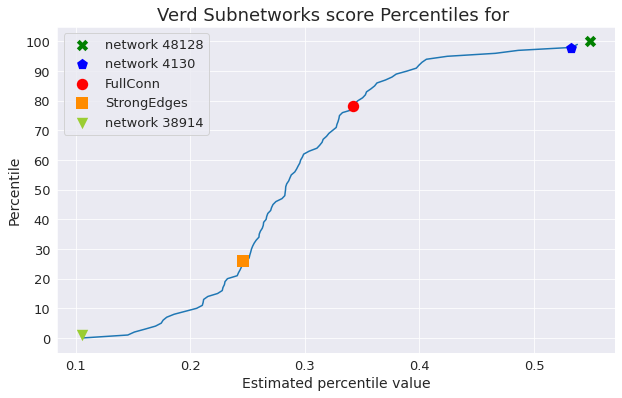

In [321]:
from cProfile import label

bins = 40
for key in ['nWCut', 'nGraph', 'nls', 'score']:
    plt.figure(figsize=(10,6))
    y = range(0, 100)
    ax = plt.gca()
    ax.set(title='Verd Subnetworks ' + key + ' Percentiles for ', 
        ylabel='Percentile',
        xlabel='Estimated percentile value',
        yticks = range(0, 101, 10))

    x = sorted([results[i][key] for i in results if results[i]['Lit Subnetwork'] == True])
    
    plt.plot(np.percentile(x, y), y, zorder=1)
    for n in interest_order:
        i = n[0]
        if results[i]['Lit Subnetwork'] == True:
            sns.scatterplot([results[i][key]], [percentileofscore(x, results[i][key])],  color=interest_color[i], marker=interest_marker[i], s=130, label = interest_name[i], linewidth=0)
    name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/"+key+"_sub_percentiles.png"

    plt.legend()    
    plt.savefig(name,dpi=300, bbox_inches = "tight")
    plt.show()

In [322]:
from collections import Counter
l = []
for n in results:
    l.append(results[n]['results']['PG size'])
d = Counter(l)
d

Counter({1440000: 56,
         1920000: 88,
         2160000: 75,
         2560000: 36,
         2880000: 296,
         3240000: 45,
         4320000: 71})

In [323]:
scr = [results[r]['score'] for r in results if results[r]['Lit Subnetwork'] == True]
m = max(scr)
w = min(scr)
for r in results:
    if results[r]['score'] == m:
        print(r)
    if results[r]['score'] == w:
        print(r)

38914
48128


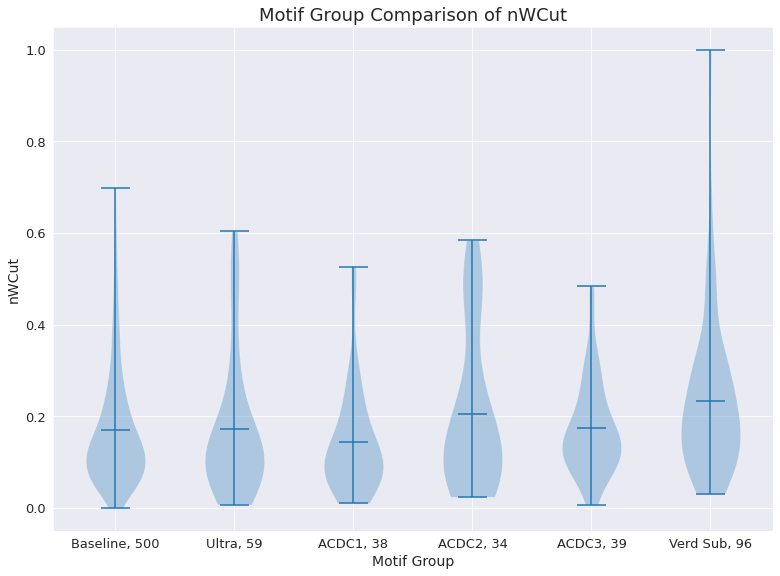

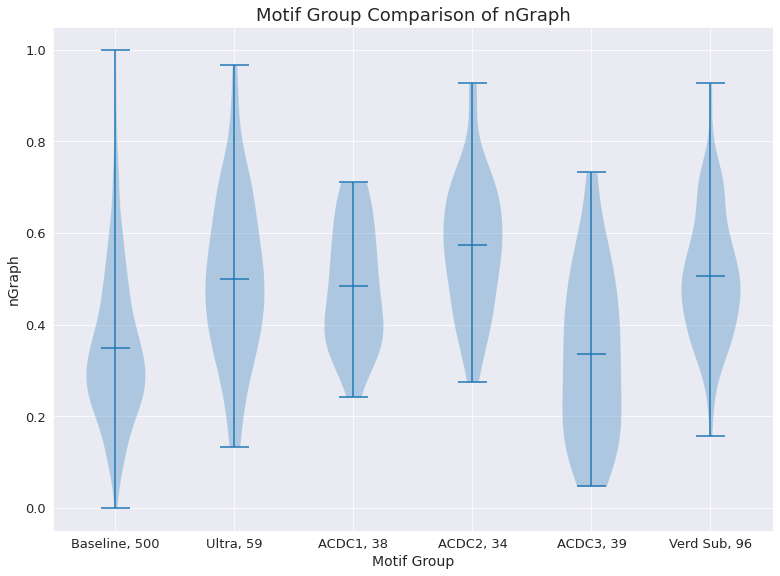

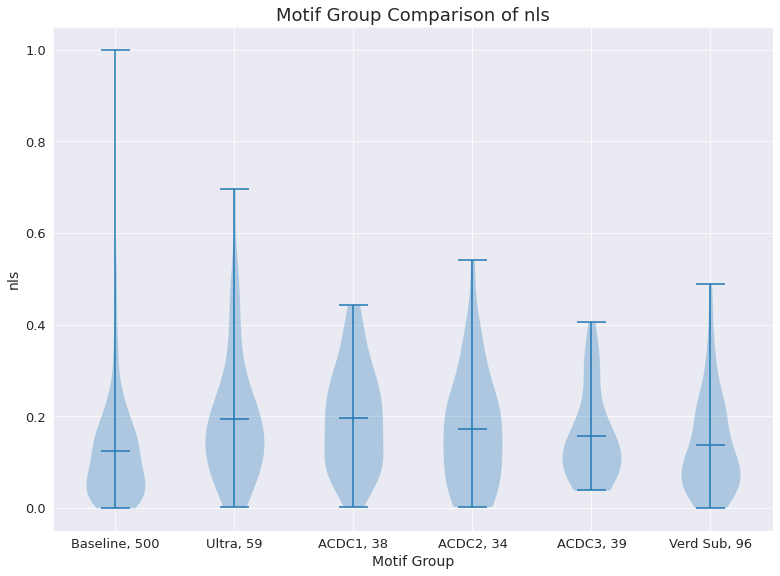

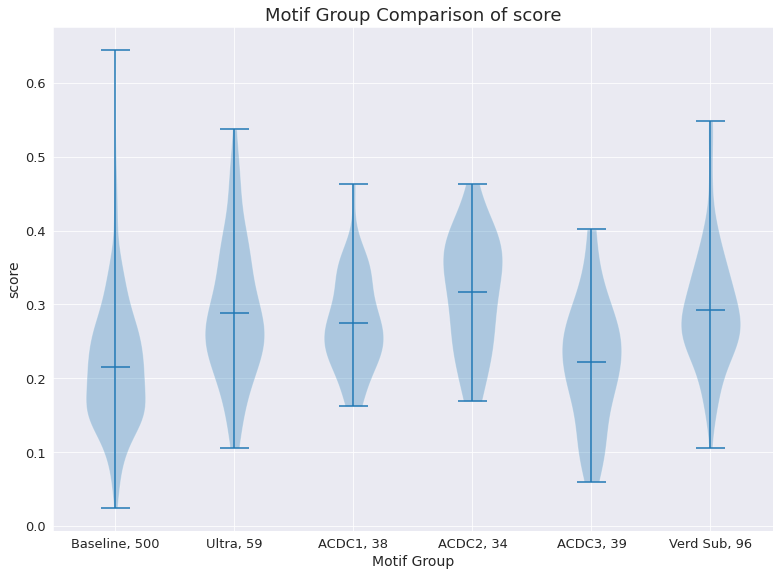

In [324]:
get_info_for = ['nWCut', 'nGraph', 'nls', 'score']
for key in get_info_for:
    data0 = [results[r][key] for r in results if results[r]['Main'] == True]
    data1 = [results[r][key] for r in results if results[r]['Ultra Strong'] == True]
    data2 = [results[r][key] for r in results if results[r]['ACDC1'] == True]
    data3 = [results[r][key] for r in results if results[r]['ACDC2'] == True]
    data4 = [results[r][key] for r in results if results[r]['ACDC3'] == True]
    data5 = [results[r][key] for r in results if results[r]['Lit Subnetwork'] == True]

    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.violinplot([data0, data1, data2, data3, data4, data5], showmeans=True)
    plt.xticks([1, 2, 3, 4, 5, 6], ['Baseline, ' + str(len(data0)), 'Ultra, ' + str(len(data1)), 'ACDC1, ' + str(len(data2)), 'ACDC2, ' + str(len(data3)), 'ACDC3, ' + str(len(data4)), 'Verd Sub, ' + str(len(data5))])
    ax.set_title('Motif Group Comparison of ' + key)
    ax.set_xlabel('Motif Group')
    ax.set_ylabel(key)
    name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/"+key+"_motifs_violin.png"
    plt.savefig(name,dpi=300, bbox_inches = "tight")
    # show plot
    plt.show()

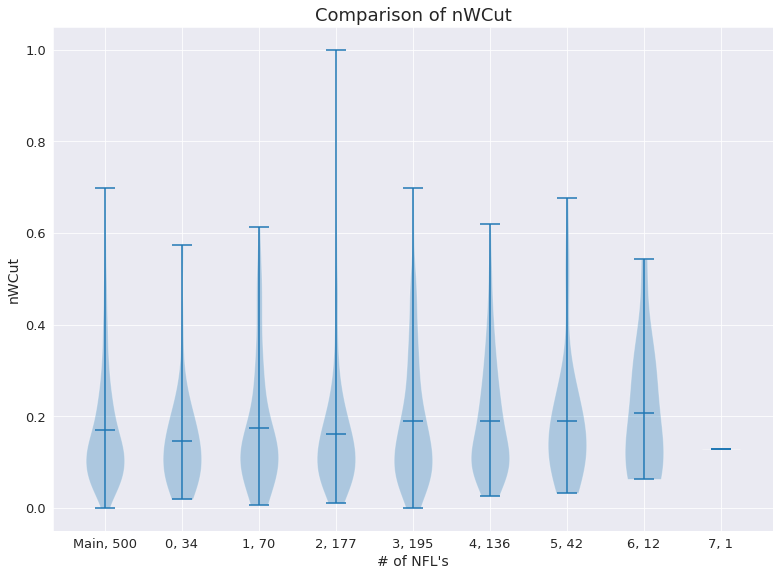

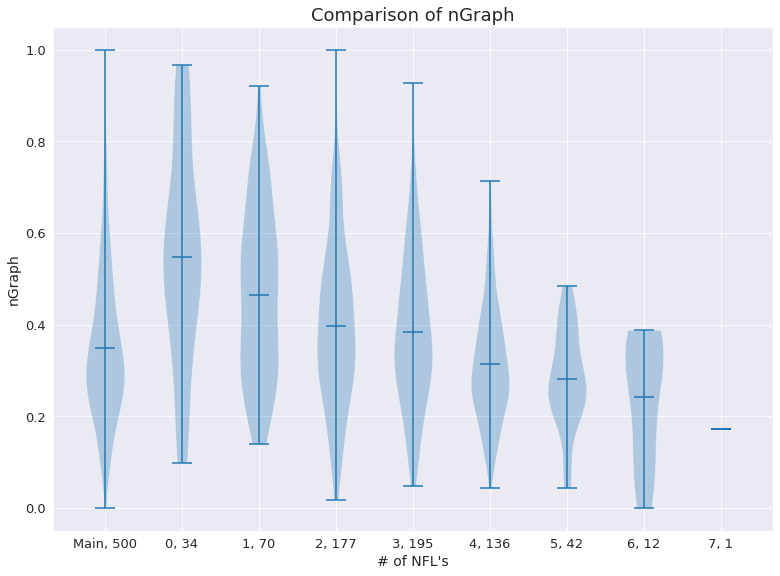

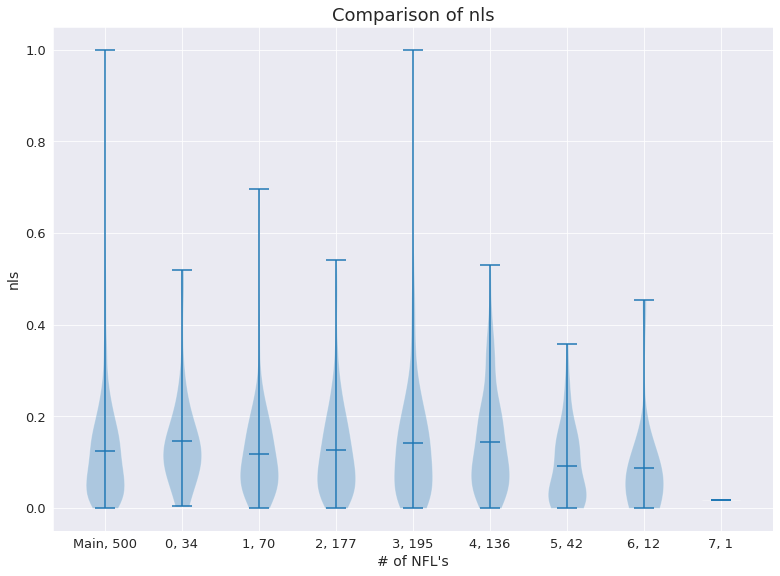

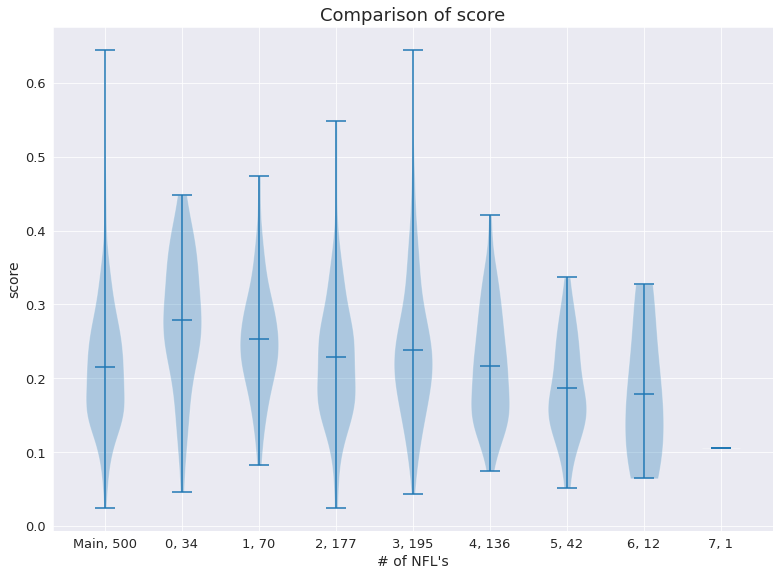

In [325]:
get_info_for = ['nWCut', 'nGraph', 'nls', 'score']

for key in get_info_for:
    data = []
    data0 = [results[r][key] for r in results if results[r]['Main'] == True]
    label = ['Main, ' + str(len(data0))]
    data.append(data0)
    for i in range(10):
        data1 = [results[r][key] for r in results if results[r]['NFL'] == i]
        if data1 != []:
            data.append(data1)
            label.append(str(i) + ', ' + str(len(data1)))
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.violinplot(data, showmeans=True)
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], label)
    ax.set_title('Comparison of ' + key)
    ax.set_xlabel('# of NFL\'s')
    ax.set_ylabel(key)
    name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/"+key+"_violin.png"
    plt.savefig(name,dpi=300, bbox_inches = "tight")
    # show plot
    plt.show()

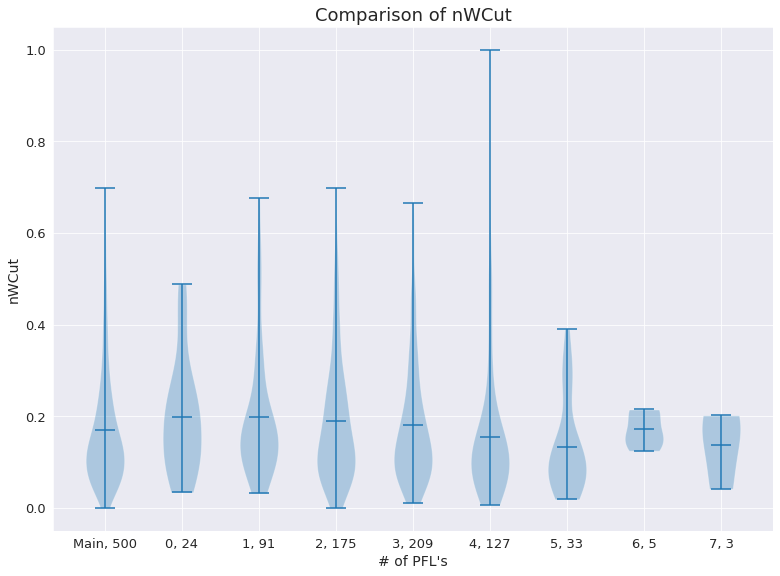

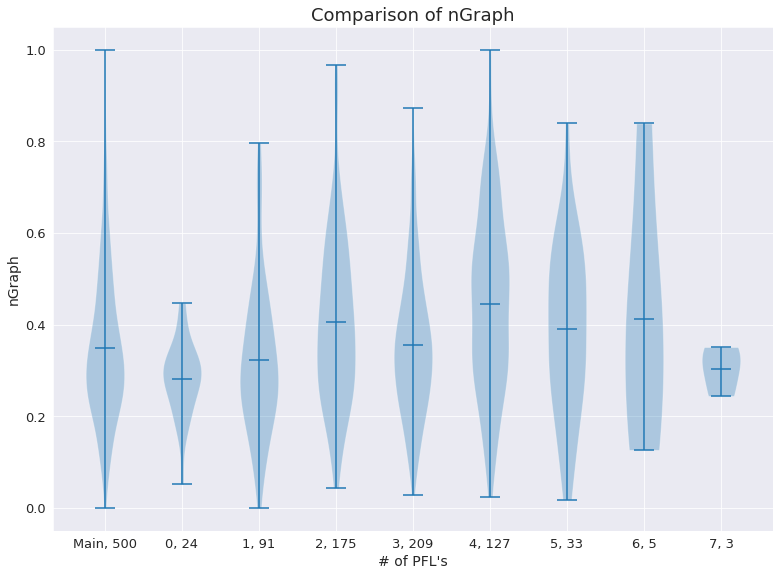

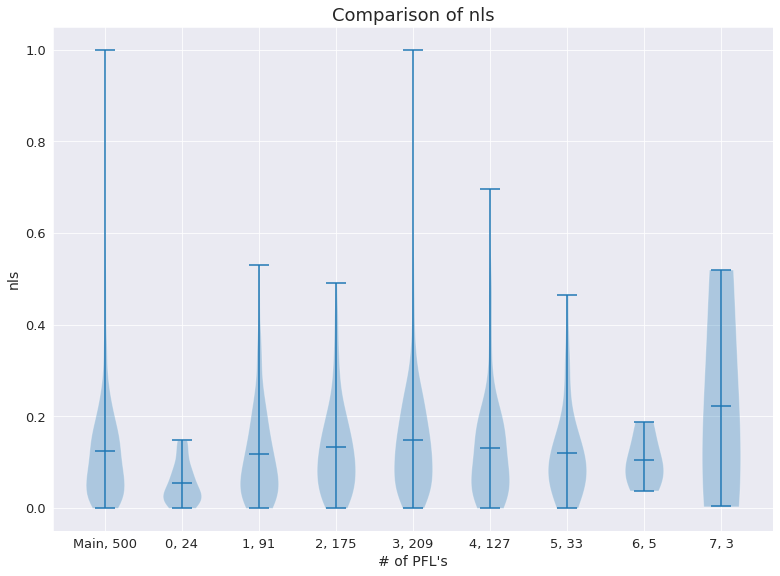

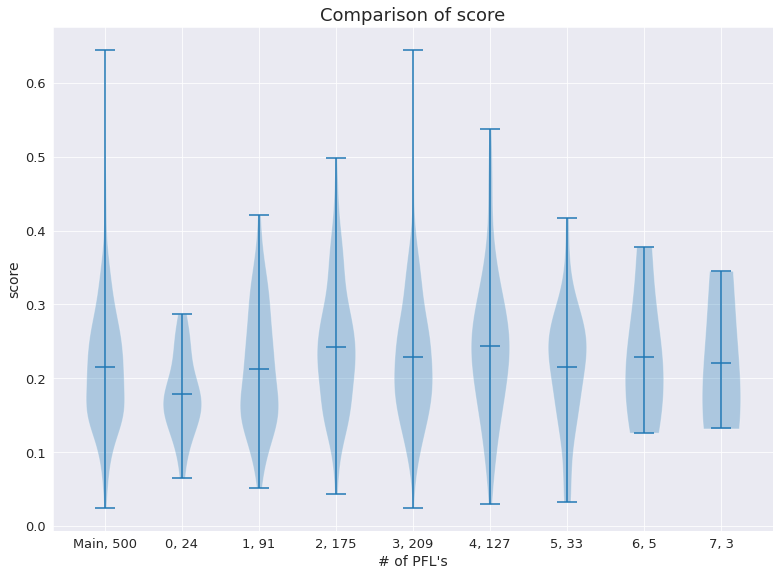

In [326]:
get_info_for = ['nWCut', 'nGraph', 'nls', 'score']

for key in get_info_for:
    data = []
    data0 = [results[r][key] for r in results if results[r]['Main'] == True]
    label = ['Main, ' + str(len(data0))]
    data.append(data0)
    for i in range(10):
        data1 = [results[r][key] for r in results if results[r]['PFL'] == i]
        if data1 != []:
            data.append(data1)
            label.append(str(i) + ', ' + str(len(data1)))
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.violinplot(data, showmeans=True)
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], label)
    ax.set_title('Comparison of ' + key)
    ax.set_xlabel('# of PFL\'s')
    ax.set_ylabel(key)
    name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/"+key+"_violin.png"
    plt.savefig(name,dpi=300, bbox_inches = "tight")
    # show plot
    plt.show()

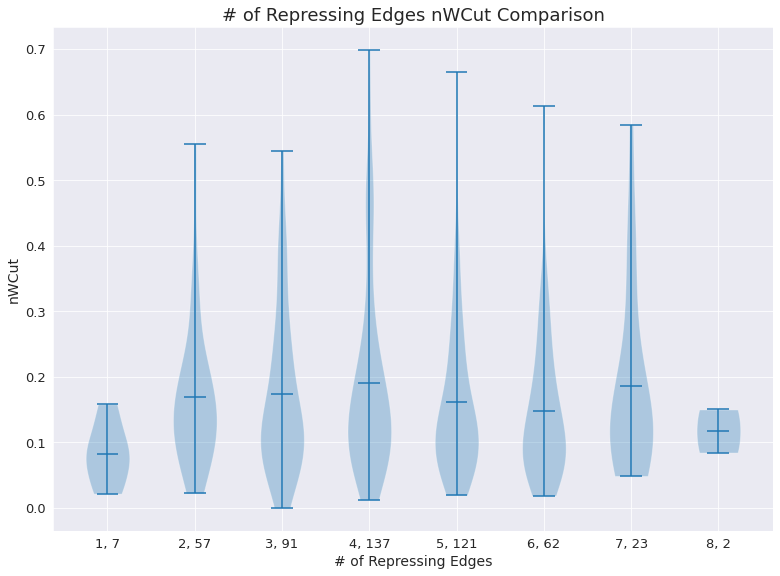

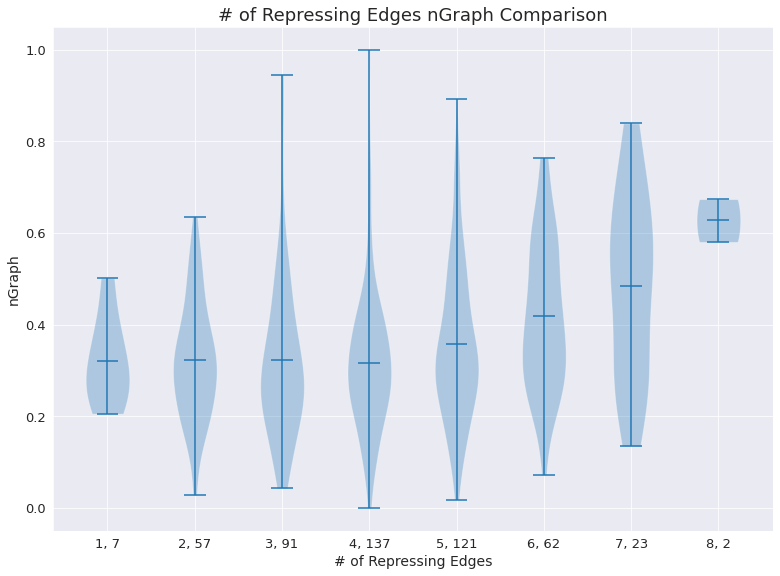

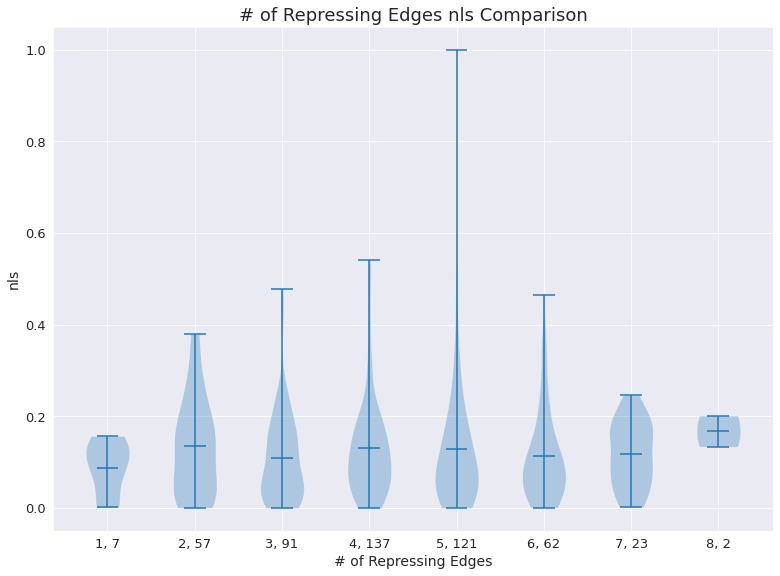

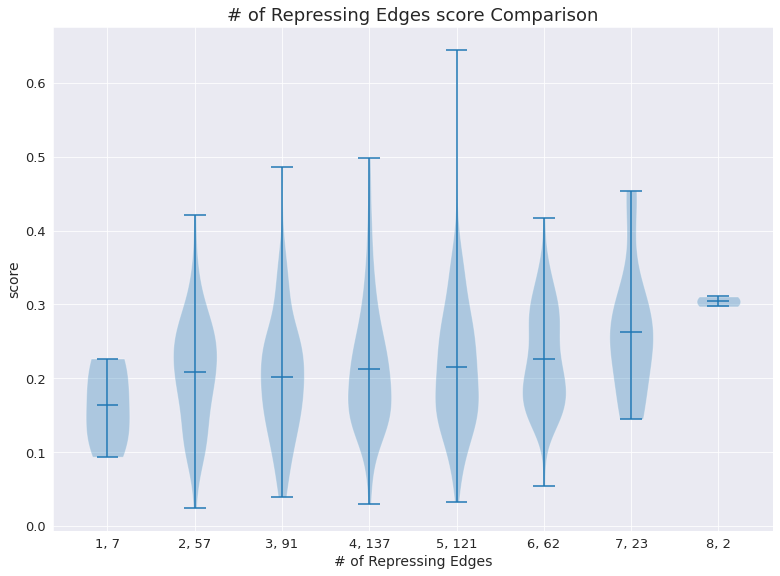

In [327]:
get_info_for = ['nWCut', 'nGraph', 'nls', 'score']

for key in get_info_for:
    data = []
    label = []
    for i in [8, 7, 6, 5, 4, 3, 2, 1, 0]:
        data1 = [results[r][key] for r in results if sum(results[r]['edges'][1]) == i if results[r]['Main'] == True]
        if data1 != []:
            data.append(data1)
            label.append(str(8-i) + ', ' + str(len(data1)))
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.violinplot(data, showmeans=True)
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], label)
    ax.set_title('# of Repressing Edges '+key+' Comparison')
    ax.set_xlabel('# of Repressing Edges')
    ax.set_ylabel(key)
    name = "/home/elizabeth/Desktop/GIT/dsgrn_acdc/Saved_Files/Figures/"+key+"_repressing_violin.png"
    plt.savefig(name,dpi=300, bbox_inches = "tight")
    # show plot
    plt.show()

In [328]:
interest_name

{46402: 'StrongEdges',
 18176: 'FullConn',
 4130: 'network 4130',
 48128: 'network 48128',
 53102: 'network 53102',
 9391: 'network 9391',
 2272: 'network 2272',
 38914: 'network 38914'}

In [329]:
def get_number_neg_out_edges_from_string(string):
    return len(re.findall('~', string, flags=re.MULTILINE))

top = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}
interest_top = {}
key = 'score'
for r in interest_name:
    network = get_network_string(results[r]['edges'][0], results[r]['edges'][1])
    interest_top[r] = network
    #n = get_number_neg_out_edges_from_string(network)
interest_top


{46402: '"""Hb : (Gt)(~Kni)\nGt : (Kni)(~Kr)\nKr : (~Gt)(~Kni)\nKni : (~Hb)(~Gt)"""',
 18176: '"""Hb : (~Kr)(~Kni)\nGt : (~Hb)(~Kr)\nKr : (~Gt)(~Kni)\nKni : (~Hb)(~Gt)"""',
 4130: '"""Hb : (Gt)(~Kni)\nGt : (Kni)(~Hb)\nKr : (~Hb)(~Gt)(~Kni)\nKni : (~Kr)"""',
 48128: '"""Hb : (~Kr)\nGt : (~Hb)\nKr : (~Hb)(~Gt)(~Kni)\nKni : (~Hb)(~Gt)(~Kr)"""',
 53102: '"""Hb : (~Kr)\nGt : (~Hb)(~Kr)(~Kni)\nKr : (~Gt)\nKni : (Gt+Kr)(~Hb)"""',
 9391: '"""Hb : (Kr+Kni)(~Gt)\nGt : (Kni)\nKr : (Hb+Gt)\nKni : (Kr)(~Gt)"""',
 2272: '"""Hb : (~Gt)\nGt : (Hb)(~Kr)(~Kni)\nKr : (Hb)(~Kni)\nKni : (Hb)(~Kr)"""',
 38914: '"""Hb : (~Kni)\nGt : (Kni)(~Kr)\nKr : (~Hb)(~Gt)(~Kni)\nKni : (~Hb)(~Gt)"""'}

In [330]:
import re
ultra_strong_motif = [(('Hb', 'Kni'), 0),(('Kni', 'Hb'), 0),(('Gt', 'Kr'), 0),(('Kr', 'Gt'), 0)]
ultra_strong_GtKr = [(('Gt', 'Kr'), 0),(('Kr', 'Gt'), 0)]
ultra_strong_HbKni = [(('Hb', 'Kni'), 0),(('Kni', 'Hb'), 0)]
ACDC1_motif = [(('Gt', 'Kr'), 0),(('Kr', 'Gt'), 0),(('Hb', 'Gt'), 0),(('Kr', 'Hb'), 0)]
ACDC2_motif = [(('Hb', 'Kni'), 0),(('Kni', 'Hb'), 0), (('Kni', 'Kr'), 0), (('Kr', 'Hb'), 0)]
ACDC3_motif = [(('Gt', 'Kr'), 0),(('Kr', 'Gt'), 0),(('Kni', 'Kr'), 0), (('Gt', 'Kni'), 0)]
best_scoring_edges = [(('Gt', 'Hb'), 1), (('Kni', 'Kr'), 0), (('Kr', 'Kni'), 0), (('Hb', 'Kni'), 0)]

Reinitz = [[['Hb', 'Kr'], ['Kr','Hb'], ['Hb', 'Kni'], ['Kni', 'Hb'], ['Gt', 'Kr'], 
            ['Kr', 'Gt'], ['Gt', 'Kni'], ['Hb', 'Gt'], ['Gt', 'Hb'], ['Kr', 'Kni'], ['Kni', 'Kr']], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ]
Reinitz_string = get_network_string(Reinitz[0], Reinitz[1])

Perkins = [[['Hb', 'Kr'], ['Kr','Hb'], ['Hb', 'Kni'], ['Kni', 'Hb'], ['Gt', 'Kr'], 
            ['Kr', 'Gt'], ['Gt', 'Kni'], ['Hb', 'Gt'], ['Kni', 'Kr']], [0, 0, 0, 0, 0, 0, 0, 0, 0] ]
Perkins_string = get_network_string(Perkins[0], Perkins[1])

Verd = [[['Hb', 'Kr'], ['Kr','Hb'], ['Hb', 'Kni'], ['Kni', 'Hb'], ['Gt', 'Kr'], ['Kr', 'Gt'], 
         ['Gt', 'Kni'], ['Kni', 'Gt'], ['Hb', 'Gt'], ['Gt', 'Hb'], ['Kr', 'Kni'], ['Kni', 'Kr']], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0] ]
Verd_string = get_network_string(Verd[0], Verd[1])

neq_edges = ['~Hb', '~Gt', '~Kr', '~Kni']
pos_edges = ['Hb', 'Gt', 'Kr', 'Kni']
color = {'Hb': 'yellow!80!black', 'Gt': 'myblue!80!white', 'Kr': 'mygreen!80!black', 'Kni': 'red!80!white'}
start_string = r'\begin{tikzpicture}[main node/.style={circle,fill=white!20,draw,font=\sffamily\normalsize\bfseries}]' + '\n' + r'\node[main node, fill=yellow] (Hb) at (1.5,1.5) {Hb};' + '\n'+r'\node[main node, fill=mygreen!80!black] (Kr) at (3,0) {Kr};'+ '\n' +r'\node[main node, fill=myblue!80!white] (Gt) at (0, 0) {Gt};'+ '\n' +r'\node[main node, fill=red!80!white] (Kni) at (1.5,-1.5) {Kni};'+ '\n' 
end_string = ';\n \end{tikzpicture}\quad'
for n in interest_order:
    i = n[0]
    print(start_string)
    print(r'\node (A) at (1.5, 2.25) {' + interest_name[i] + '};\n')
    print(r'\path[->,>=angle 90,ultra thick]')
    s= interest_top[i]
    #print(s)
    Hb = re.search('Hb :', s).span()
    Gt = re.search('Gt :', s).span()
    Kr = re.search('Kr :', s).span()
    Kni = re.search('Kni :', s).span()
    iter = [('(Hb)', s[Hb[1]:Gt[0]]), ('(Gt)', s[Gt[1]:Kr[0]]), ('(Kr)',s[Kr[1]:Kni[0]]), ('(Kni)',s[Kni[1]:])]
    for i in iter:
        for ne in neq_edges:
            if ne in i[1]:
                print('('+ ne[1:] + ') edge[-|, bend left, shorten >= 3pt, ' + color[ne[1:]] + '] ' + i[0] )
            else:
                if ne[1:] in i[1]:
                    print('('+ ne[1:] + ') edge[->, bend left, shorten >= 3pt, ' + color[ne[1:]] + '] ' + i[0] )
    print(end_string)

main_net = [('Perkins', Perkins_string), ('Reinitz', Reinitz_string), ('Verd', Verd_string)]

for i in main_net:
    print(start_string)
    print(r'\node (A) at (1.5, 2.25) {' + i[0] + '};\n')
    print(r'\path[->,>=angle 90,ultra thick]')
    s= i[1]
    #print(s)
    Hb = re.search('Hb :', s).span()
    Gt = re.search('Gt :', s).span()
    Kr = re.search('Kr :', s).span()
    Kni = re.search('Kni :', s).span()
    iter = [('(Hb)', s[Hb[1]:Gt[0]]), ('(Gt)', s[Gt[1]:Kr[0]]), ('(Kr)',s[Kr[1]:Kni[0]]), ('(Kni)',s[Kni[1]:])]
    for i in iter:
        for ne in neq_edges:
            if ne in i[1]:
                print('('+ ne[1:] + ') edge[-|, bend left, shorten >= 3pt, ' + color[ne[1:]] + '] ' + i[0] )
            else:
                if ne[1:] in i[1]:
                    print('('+ ne[1:] + ') edge[->, bend left, shorten >= 3pt, ' + color[ne[1:]] + '] ' + i[0] )
    print(end_string)

ACDC = [('ACDC1', ACDC1_motif), ('ACDC2', ACDC2_motif), ('ACDC3', ACDC3_motif)]
for i in ACDC:
    print(start_string)
    print(r'\node (A) at (1.5, 2.25) {' + i[0] + '};\n')
    print(r'\path[->,>=angle 90,ultra thick]')
    for e in i[1]:
        if e[1] == 0:
            print('('+ e[0][0] + ') edge[-|, bend left, shorten >= 3pt, ' + color[e[0][0]] + '] (' + e[0][1] + ')' )
        else:
            print('('+ e[0][0] + ') edge[->, bend left, shorten >= 3pt, ' + color[e[0][0]] + '] (' + e[0][1] + ')' )
    print(end_string)


\begin{tikzpicture}[main node/.style={circle,fill=white!20,draw,font=\sffamily\normalsize\bfseries}]
\node[main node, fill=yellow] (Hb) at (1.5,1.5) {Hb};
\node[main node, fill=mygreen!80!black] (Kr) at (3,0) {Kr};
\node[main node, fill=myblue!80!white] (Gt) at (0, 0) {Gt};
\node[main node, fill=red!80!white] (Kni) at (1.5,-1.5) {Kni};

\node (A) at (1.5, 2.25) {network 2272};

\path[->,>=angle 90,ultra thick]
(Gt) edge[-|, bend left, shorten >= 3pt, myblue!80!white] (Hb)
(Hb) edge[->, bend left, shorten >= 3pt, yellow!80!black] (Gt)
(Kr) edge[-|, bend left, shorten >= 3pt, mygreen!80!black] (Gt)
(Kni) edge[-|, bend left, shorten >= 3pt, red!80!white] (Gt)
(Hb) edge[->, bend left, shorten >= 3pt, yellow!80!black] (Kr)
(Kni) edge[-|, bend left, shorten >= 3pt, red!80!white] (Kr)
(Hb) edge[->, bend left, shorten >= 3pt, yellow!80!black] (Kni)
(Kr) edge[-|, bend left, shorten >= 3pt, mygreen!80!black] (Kni)
;
 \end{tikzpicture}\quad
\begin{tikzpicture}[main node/.style={circle,fill=white!